# Movie Classifier

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot, pylab

#hint: Consult the scikit-learn documentation to
#      learn about what these classes do do
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  Begin by loading the datasets and dropping rows that have missing data:

In [2]:
reviews = pd.read_csv('reviews.csv')
movies = pd.read_csv("movies.dat", delimiter='\t')

reviews = reviews[~reviews.quote.isnull()]
reviews = reviews[~reviews.critic.isnull()]
reviews = reviews[reviews.fresh != 'none']
reviews = reviews[reviews.quote.str.len() > 0]

In [3]:
reviews.head()

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,A winning animated feature that has something ...,2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,The film sports a provocative and appealing st...,2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10 00:00:00,9559,Toy Story


### 1.1: Basic features of the dataset

Answer the following questions by having your python code directly print the answers:

* How many unique reviews (quotes) are in the `reviews` dataset?
* How many unique reviewers (critics) are in the `reviews` dataset?
* How many unique movies are in the `reviews` dataset?
* How many unique movies are in the *`movies`* dataset?
* How many different publications have reviews in the `reviews` dataset?


In [4]:
# enter your code below

print "Number of reviews: %i" % len(reviews)
print "Number of unique reviews: %i" %pd.unique(reviews["quote"]).shape
print "Number of unique reviewers: %i" %pd.unique(reviews["critic"]).shape
print "Number of unique movies in reviews dataset: %i" %pd.unique(reviews["title"]).shape
print "Number of unique movies in movies dataset: %i" %pd.unique(movies["title"]).shape
print "Number of different publications in reviews dataset: %i" %pd.unique(reviews["publication"]).shape

Number of reviews: 12718
Number of unique reviews: 12149
Number of unique reviewers: 540
Number of unique movies in reviews dataset: 1715
Number of unique movies in movies dataset: 9405
Number of different publications in reviews dataset: 64


### 1.2 Number of reviews per reviewer

Using the `reviews` dataset, create a histogram showing the distribution of the number of reviews per reviewer.  Create the bin width (x-axis) to be 1 unit wide, and the range of the axis to be from 0 to 30.  Scale the y-axis to show the logarithm of (count of) the number of reviews.  Label your axes and make your histogram look professional.

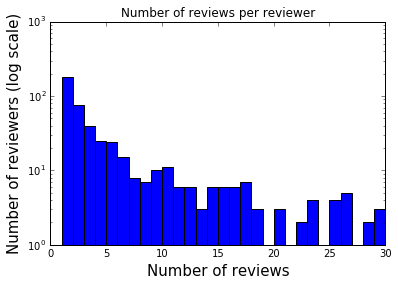

In [5]:
plt.figure(1)
review_critics = reviews.groupby(['critic']).count()

plt.hist(review_critics["fresh"], range=[0,30], bins=(30), facecolor='blue', edgecolor='black')

plt.yscale('log', nonposy='clip')
plt.title("Number of reviews per reviewer")
plt.ylabel("Number of reviewers (log scale)", fontsize = 15)
plt.xlabel("Number of reviews", fontsize=15)

### 1.3 Zoom in on a few reviewers
Find the 30 critics with the most reviews, and list their names in a table along with (a) the name of the publication they work for, (b) the date of their first review, and (c) the date of their last review

*hint: use the groupby function to do this quickly*

In [6]:
reviews["review_date"] =  pd.to_datetime(reviews["review_date"])

In [7]:
aggregations = {
    "review_date": [np.min, np.max],
    "publication": lambda x : pd.unique(x),
    "quote": lambda x : len(x)
}

In [8]:
reviews.groupby(["critic"], as_index=False).agg(aggregations).sort([('quote', '<lambda>')], ascending=False).head(30)

C:\Users\Aamir-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


critic    quote         review_date             \
                        <lambda>                amin       amax   
453         Roger Ebert     1150          2000-01-01 2013-06-11   
220  James Berardinelli      833 1800-01-01 00:00:00 2012-02-07   
228        Janet Maslin      526          2000-01-01 2010-09-07   
529       Variety Staff      449          2001-02-13 2012-08-15   
285  Jonathan Rosenbaum      420          1988-07-11 2013-10-22   
145      Desson Thomson      373          2000-01-01 2012-10-08   
194        Geoff Andrew      361          2005-08-11 2012-04-05   
121           Dave Kehr      360          2000-01-01 2013-11-20   
307       Kenneth Turan      282          2000-01-01 2013-10-05   
374        Mick LaSalle      280          2000-01-01 2009-11-25   
397     Owen Gleiberman      241 1800-01-01 00:00:00 2011-09-07   
440        Rita Kempley      236          2000-01-01 2013-11-02   
255         Joe Baltake      231          2000-01-01 2013-08-04   
514       Todd McCarthy      223          2000-01-01 2012-10-09   
531       Vincent Canby      207          2000-01-01 2013-07-29   
203          Hal Hinson      174          2000-01-01 2013-06-26   
498         Susan Stark      167          2000-01-01 2002-10-25   
488      Stephen Holden      166          2000-01-01 2009-02-06   
142         Derek Adams      154          2006-01-26 2009-10-04   
314        Kevin Thomas      145          2000-01-01 2013-11-02   
414         Peter Stack      138          2000-01-01 2002-06-18   
58      Bosley Crowther      137          2000-01-01 2008-05-06   
439          Rick Groen      129          2002-03-19 2009-08-14   
157     Edward Guthmann      121          2000-01-01 2003-04-04   
337    Lisa Schwarzbaum      117          1979-01-01 2012-08-15   
331          Liam Lacey      111          2001-08-24 2012-04-04   
167        Emanuel Levy      110          2000-01-01 2010-08-06   
438    Richard Schickel      106          2000-01-01 2013-08-05   
429     Richard Corliss      104          2003-12-16 2013-11-06   
372  Michael Wilmington      103          2000-01-01 2013-11-21   

                                           publication  
                                              <lambda>  
453                 [Chicago Sun-Times, At the Movies]  
220                                          ReelViews  
228                                     New York Times  
529                                            Variety  
285                                     Chicago Reader  
145                                    Washington Post  
194                                           Time Out  
121  [Chicago Reader, New York Daily News, Chicago ...  
307                                  Los Angeles Times  
374                            San Francisco Chronicle  
397                               Entertainment Weekly  
440                                    Washington Post  
255  [Sacramento Bee, Passionate Moviegoer, Philade...  
514                                            Variety  
531                                     New York Times  
203                                    Washington Post  
498                                       Detroit News  
488                                     New York Times  
142                                           Time Out  
314                                  Los Angeles Times  
414                            San Francisco Chronicle  
58                                      New York Times  
439                                     Globe and Mail  
157                            San Francisco Chronicle  
337                               Entertainment Weekly  
331                                     Globe and Mail  
167                                            Variety  
438                      [TIME Magazine, The Atlantic]  
429                                      TIME Magazine  
372               [Chicago Tribune, Los Angeles Times]

### 1.4 Ratings over time

Using the `movies` dataset, create a plot that shows how the average rating per movie (rtAllCriticsRating) has evolved over time.  Do this by creating a scatterplot where the x-axis is the year in which the movie was released and the y-axis is rtAllCriticsRating.  Drop movies with 0 or unknown values to avoid biasing your results.  Then, create a scatterplot that has one <year,rating> point for each remaining movie, and pick an appropriate size/color/transparency for these points to ensure that the graph looks professional.  In other words, do not simply use the default settings, as this will produce a dense mess of dots that will be hard to interpret.  Finally, overlay on this scatterplot a line graph in orange showing how the average movie rating (the average of rtAllCriticsRating across all movies in a year) has changed over time.  Do you notice a trend?  What do you think it means?

C:\Users\Aamir-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


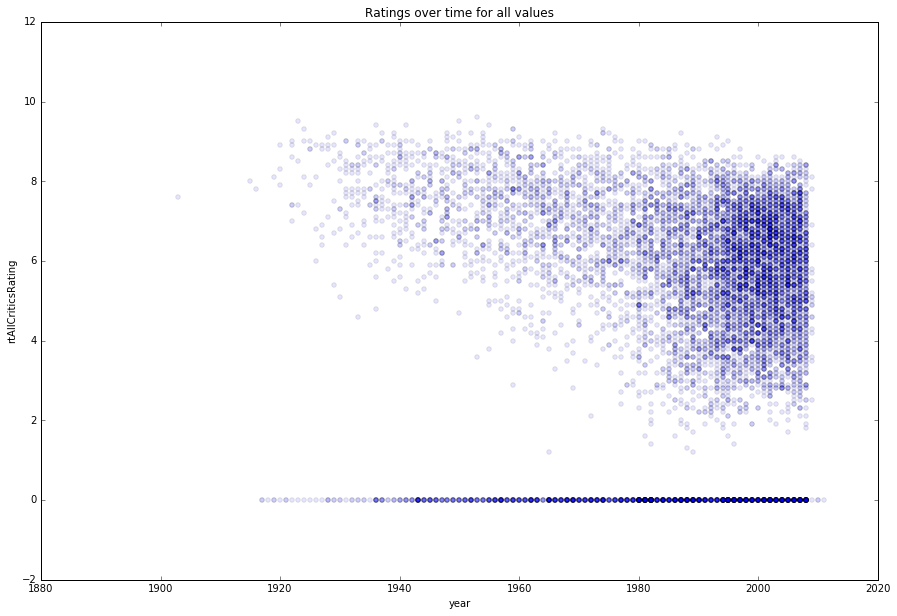

In [9]:
#movies["rtAllCriticsRating"]
ratings_time_df = movies[["year","rtAllCriticsRating"]]
ratings_time_df=ratings_time_df.convert_objects(convert_numeric=True)
#ratings_time_df = ratings_time_df[ratings_time_df["rtAllCriticsRating"]!=0]
ratings_time_df.plot(x = "year", y = "rtAllCriticsRating", alpha = 0.1, figsize=(15,10), kind = "scatter")
#ratings_time_df.plot()
plt.title("Ratings over time for all values")

In [10]:
ratings_time_df = ratings_time_df[ratings_time_df["rtAllCriticsRating"]!=0]

In [11]:
average_yearly_rating_df=ratings_time_df.groupby("year", as_index=False).mean()

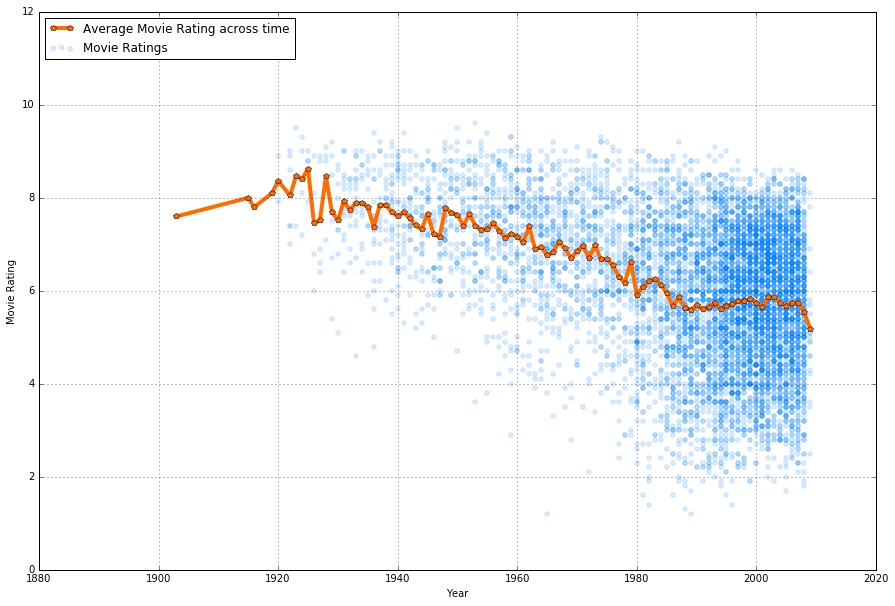

In [12]:
#ratings_time_df.plot(x = "year", y = "rtAllCriticsRating", alpha = 0.1, figsize=(15,10), kind = "scatter")

fig, ax = plt.subplots(figsize=(15, 10))
ax.grid(True)
#ax.text(8.7, 48, "y = -34.67 + 9.1x")
#ax.text(8.7, 59, "y = 66.05 - 22.64x + 2.47x^2")
ax.scatter(ratings_time_df["year"], ratings_time_df["rtAllCriticsRating"], alpha=0.15, color='#0080ff', label ="Movie Ratings")
ax.plot(average_yearly_rating_df["year"],average_yearly_rating_df["rtAllCriticsRating"], color = "#ff6d00", marker = "p", linestyle = "-" ,linewidth = 4,  label ="Average Movie Rating across time")
pylab.ylabel("Movie Rating")
pylab.xlabel("Year")
pylab.legend(loc="upper left")

* We observe that the average movie rating for movies shows a declining trend overall. This could be because as the technology advanced, better movies were produced. This resulted in greater competition among movies for ratings. Another reason could be that as more and more movies were produced, the number of people who would watch and rate all movies reduced. This could have led to lesser ratings.

---

## Part 2: Naive Bayes

Now it gets fun!  You are going to use a [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) to build a prediction model for whether a review is fresh or rotten, depending on the text of the review. Review the assigned readings on Canvas, as well as the relevant lecture notes before embarking on this journey.

### Using CountVectorizer

One thing that may help you in the following problems is the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn.  This will help you convert your raw text fields into "bag of words" vectors, i.e. a data structure that tells you how many times a particular word appears in a blurb.  Here's a simple example, make sure you understand what's going on!

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['machine learning rocks', 'machine learning rules', 'rocks rocks rules']
print "Original text is\n", '\n'.join(text)

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print
print "Transformed text vector is \n", x

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print "Words for each feature:"
print vectorizer.get_feature_names()

Original text is
machine learning rocks
machine learning rules
rocks rocks rules

Transformed text vector is 
[[1 1 1 0]
 [1 1 0 1]
 [0 0 2 1]]

Words for each feature:
[u'learning', u'machine', u'rocks', u'rules']


### 2.1 Create your X input and Y output

Using the `reviews` dataframe, compute a pair of numerical X, Y arrays where:
    
 * X is a `(nreview, nwords)` array. Each row corresponds to a bag-of-words representation for a single review. This will be the *input* to your model.
 * Y is a `nreview`-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired *output* from your model.
 
Make sure to remove items with no review text

In [14]:
"""
Function
--------
make_xy

Build a bag-of-words training set for the review data

Parameters
-----------
reviews : Pandas DataFrame
    The review data from above
    
vectorizer : CountVectorizer object (optional)
    A CountVectorizer object to use. If None,
    then create and fit a new CountVectorizer.
    Otherwise, re-fit the provided CountVectorizer
    using the reviews data
    
Returns
-------
X : numpy array (dims: nreview, nwords)
    Bag-of-words representation for each review.
Y : numpy array (dims: nreview)
    1/0 array. 1 = fresh review, 0 = rotten review

Examples
--------
X, Y = make_xy(reviews)
"""
def make_xy(df, vectorizer=None):
    review_text = list(df["quote"])
    
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=0)

    # call `fit` to build the vocabulary
    vectorizer.fit(review_text)

    # call `transform` to convert text to a bag of words
    X = vectorizer.transform(review_text)

    # CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
    # convert back to a "normal" numpy array
    X = X.toarray()
    
    Y = pd.DataFrame(reviews["fresh"])
    Y.loc[Y["fresh"] == "fresh","fresh"] = 1
    Y.loc[Y["fresh"] == "rotten","fresh"] = 0
    Y = np.array(Y).reshape(len(Y))
    Y = Y.astype(int)
    
#     Y = np.asarray(df['fresh'], dtype="|S6")
    
    return X, Y

### 2.2 Test-Train split

Next, randomly split the data into two groups: a training set and a validation set.  You can do this manually, as you did in the prior problem set.  Or, use [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) to do this auto-magically.  See [this guide](http://scikit-learn.org/stable/modules/cross_validation.html) for a simple example of how `train_test_split` works.

In [15]:
X,Y = make_xy(reviews)

In [16]:
#creating test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.34, random_state = 2)

### 2.3 Naive Bayes with `MultinomialNB`
Use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
 object.  Report the accuracy of this model on both the training and testing data.  What do you observe?  Interpret these results!

*Hint: This shouldn't take more than 5-10 lines of code to accomplish*



In [17]:
# enter your code here

# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB().fit(X_train, y_train)

In [18]:
# STEP 3: make predictions on the testing set
y_pred_test = fitted_model.predict(X_test)
y_pred_train = fitted_model.predict(X_train)
# compare actual response values (y_test) with predicted response values (y_pred)
print "Accuracy on the test set: %s"%(metrics.accuracy_score(y_test, y_pred_test))
print "Accuracy on the train set: %s"%(metrics.accuracy_score(y_train, y_pred_train))

Accuracy on the test set: 0.761849710983
Accuracy on the train set: 0.930656499464


* As expected, the accuracy on the training set is more on than that test set.

---

## Part 3: Evaluation

### 3.1 Estimate the likelihood of your data

Given a fitted model, you can compute the log-likelihood of your data as a way to assess the performance of your model.  Using `fitted_model.predict_logproba`, the idea is to write a function that computes the log-likelihood of a dataset, so that we can inspect the log-likelihood of your training and testing data given your fitted model from part 2.

To help you out a little bit, we'll do this part for you. But make sure you understand it, because you'll need to use this later!

In [20]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(model, x, y):
    prob = model.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

# output the likelihood of your test data (example - you may need to 
# chance the nambes of the variables below to match your code in 2.2 and 2.3
log_likelihood(fitted_model, X_train, y_train)

-1483.4900192346722

### 3.2 Cross-Validation

Why do we care about the log-likelihood of our data?  You guessed it: Cross-Validation.

Our classifier has a few hyperparameters. The two most important are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

How are we are going to use cross-validation to tune these hyperparameters?  The objective function we want to maximize is the log-likelihood of our data.  Fill in the remaining code in this block, to loop over many values of `alpha` and `min_df` to determine
which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, `sklearn.cross_validation.cross_val_score`, that might save you a lot of time here...*

In [21]:
import time
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha_NB = None
best_min_df_NB = None
max_loglike = -np.inf

start_time = time.time()

for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        X, Y = make_xy(reviews, vectorizer)
        fitted_model = MultinomialNB(alpha = alpha)
        #log_like = log_likelihood(fitted_model, X, Y)
        score = cross_val_score(fitted_model, X, Y, cv = 3, scoring=log_likelihood)
        if score.mean() > max_loglike:
            max_loglike = score.mean()
            best_alpha_NB = alpha
            best_min_df_NB = min_df
            
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
print best_alpha_NB
print best_min_df_NB
print max_loglike

Time taken: 136.08 seconds
5
0.001
-2353.07320543


### 3.3 Putting it together

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the steps in 2.1-2.3 to train a final classifier with these parameters and re-evaluate the accuracy.  Discuss the various ways in which Cross-Validation has affected the model. Is the new model more or less accurate? Is overfitting better or worse?

In [22]:
vectorizer = CountVectorizer(best_min_df_NB)
X, Y = make_xy(reviews,vectorizer)

#creating test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.34, random_state = 5)

# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB(alpha = best_alpha_NB).fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = fitted_model.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print metrics.accuracy_score(y_test, y_pred)

0.678150289017


* The model accuracy with the best hyperparameters obtained using cross validation is around 67.8 %. The new model is less accuarate. 

* Overfitting the model is not a good thing to do. We should always try to generalize the model such that it captures only the important relation in the data. Overfitted models do not generalize well and perform poorly on unseen data.

### 3.4

What happens if you tried this again using a function besides the log-likelihood -- for example, the classification accuracy?  Interpret these results

In [23]:
#Enter your code here

import time
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
max_score = 0
#cross_val_scores = [0]

start_time = time.time()

for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        X, Y = make_xy(reviews, vectorizer)
        fitted_model = MultinomialNB(alpha = alpha)
        #log_like = log_likelihood(fitted_model, X, Y)
        score = cross_val_score(fitted_model, X, Y, cv = 3, scoring="accuracy")
        #cross_val_scores.append(score.mean())
        if score.mean() > max_score:
            max_score = score.mean()
            best_alpha = alpha
            best_min_df = min_df
            
print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
print best_alpha
print best_min_df
print max_score

Time taken: 145.88 seconds
1
1e-05
0.763406295541


In [24]:
vectorizer = CountVectorizer(best_min_df)
X, Y = make_xy(reviews,vectorizer)

#creating test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.34, random_state = 5)

# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB(alpha = best_alpha).fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = fitted_model.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print metrics.accuracy_score(y_test, y_pred)

0.77549132948


* The accuracy comes out to be around 77.5% when we use the scoring criteria as accuracy. This model is more accurate as compared to the previous model where log likelihood was used as a scoring parameter. 

### 3.5 Interpretation

What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [25]:
vectorizer = CountVectorizer(min_df = best_min_df_NB, stop_words="english")
vectorizer.fit(list(reviews["quote"]))

X, Y = make_xy(reviews,vectorizer)

# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB(alpha = best_alpha_NB).fit(X, Y)

feature_words = vectorizer.get_feature_names()
#print len(feature_words)

#identity matrix
X_identity = np.identity(len(feature_words))

#probablity
Y_prob = fitted_model.predict_proba(X_identity)

In [26]:
#creating a data frame of words with Fresh and Rotten probabilities
words_df = pd.DataFrame({"Word": feature_words, 
                         "Probability Fresh":list(Y_prob[:,1]), "Probability Rotten":list(Y_prob[:,0])})

In [27]:
print "\n10 words which best predict a fresh review : \n"
print words_df[["Probability Fresh","Word"]].sort_values("Probability Fresh", ascending=False).head(10)
print "\n10 words which best predict a rotten review : \n"
print words_df[["Probability Rotten","Word"]].sort_values("Probability Rotten", ascending=False).head(10)


10 words which best predict a fresh review : 

      Probability Fresh           Word
425            0.905297        delight
1076           0.903396    masterpiece
1798           0.876923       touching
905            0.875213    intelligent
1382           0.874844           rare
1703           0.871032         superb
1414           0.871032     remarkable
1684           0.867220       stunning
1955           0.865631          witty
601            0.864550  extraordinary

10 words which best predict a rotten review : 

      Probability Rotten            Word
1850            0.882888   unfortunately
972             0.856465            lame
1299            0.843493       pointless
1852            0.833459      uninspired
167             0.827943           bland
467             0.806593  disappointment
1851            0.806593         unfunny
1787            0.801671        tiresome
499             0.800980            dull
1470            0.785277           sadly


* The 10 best words which accurately predict the freshness of a movie are shown above with their respective probablities.

### 3.6 Error Analysis

One of the best sources for inspiration when trying to improve a model is to look at examples where the model performs poorly.  Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.

What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? In your answer, report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".

In [28]:
#creating a dataframe with predicted probabilities, classification and actual classification 
review_class_df = pd.DataFrame({"Review Text":reviews["quote"],
                                "Probablity-Fresh":fitted_model.predict_proba(X)[:,1],
                                "Probablity-Rotten":fitted_model.predict_proba(X)[:,0],
                                "Predicted Classification":fitted_model.predict(X),
                               "Actual Classification":Y})

In [29]:
print "Top 5 Reviews that were classified as rotten but were actually fresh : \n"
review_class_df[review_class_df["Actual Classification"]==1].sort_values("Probablity-Rotten",ascending=False).head(5)

Top 5 Reviews that were classified as rotten but were actually fresh : 



,Actual Classification,Predicted Classification,Probablity-Fresh,Probablity-Rotten,Review Text
5400,1,0,0.006867,0.993133,"Some of the gags don't work, but fewer than in..."
9833,1,0,0.014737,0.985263,The real question with Rocky III was how Sylve...
670,1,0,0.018304,0.981696,A good half-hour's worth of nonsense in the mi...
5109,1,0,0.023435,0.976565,"I saw this at a festival and hated it, then sa..."
13261,1,0,0.028518,0.971482,"Supernova, though predictable, isn't half bad."


In [30]:
print "Top 5 Reviews that were classified as fresh but were actually rotten : \n"
review_class_df[review_class_df["Actual Classification"]==0].sort_values("Probablity-Fresh",ascending=False).head(5)

Top 5 Reviews that were classified as fresh but were actually rotten : 



,Actual Classification,Predicted Classification,Probablity-Fresh,Probablity-Rotten,Review Text
4133,0,1,0.992578,0.007422,The Disney organization is worst when it makes...
9800,0,1,0.990614,0.009386,Pale Rider does nothing to disprove the wisdom...
13406,0,1,0.986761,0.013239,Benefits from a lively lead performance by the...
11644,0,1,0.986128,0.013872,"At best, it is fun. But ""fun"" is not an aesthe..."
12515,0,1,0.985336,0.014664,This pacifist spirit of brotherhood echoes the...


In [31]:
# new make_xy
def make_xy_1(df, vectorizer=None):
    review_text = list(df["quote"])
    
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=0)

    # call `fit` to build the vocabulary
    vectorizer.fit(review_text)

    # call `transform` to convert text to a bag of words
    X = vectorizer.transform(review_text)

    # CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
    # convert back to a "normal" numpy array
    X = X.toarray()
    
    Y = pd.DataFrame(df["fresh"])
    Y.loc[Y["fresh"] == "fresh","fresh"] = 1
    Y.loc[Y["fresh"] == "rotten","fresh"] = 0
    Y = np.array(Y).reshape(len(Y))
    Y = Y.astype(int)
    
#     Y = np.asarray(df['fresh'], dtype="|S6")
    
    return X, Y

In [32]:
#creating a dummy row for the example
last_row=pd.DataFrame([['','fresh','','','','This movie is not remarkable, touching, or superb in any way','','','']], 
                  columns=['critic','fresh','imdb','link','publication','quote','review_date','rtid','title'])
#creating a new reviews data set by appending the last_row
reviews_new=reviews.append(last_row, ignore_index=True)
#fitted_model.predict_proba()
vectorizer = CountVectorizer(min_df = best_min_df_NB, stop_words='english') 
X, Y = make_xy_1(reviews_new, vectorizer)
nb = MultinomialNB(alpha=best_alpha_NB)
fitted_model=nb.fit(X,Y)
new_model = fitted_model.predict_proba(X)

print "The probability of the example text as per the model is = %s"%(new_model[int(new_model.shape[0])-1][1])

The probability of the example text as per the model is = 0.993085737007


* We notice that the naive bayes model classifies a text based on the probabilities of the words. It simply adds up the probabilities of the words and doesnt take into account the context. The classification relies heavily upon the log likelihood of the words in the text. This is what causes misclassifiactions. In order for the prediction to be accurate, the interaction between the words should also be accounted, which is not happening here.

## Part 4: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [33]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
bdata = load_boston()

In [34]:
# reset data as pandas DataFrame
boston_df = pd.DataFrame(bdata.data)

# label columns
boston_df.columns = bdata.feature_names

# Set price column for target
boston_df['MEDV'] = bdata.target

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  If you didn't get full credit for this on the first problem set, get full credit this time!

Then, just as you did on the previous problem set, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

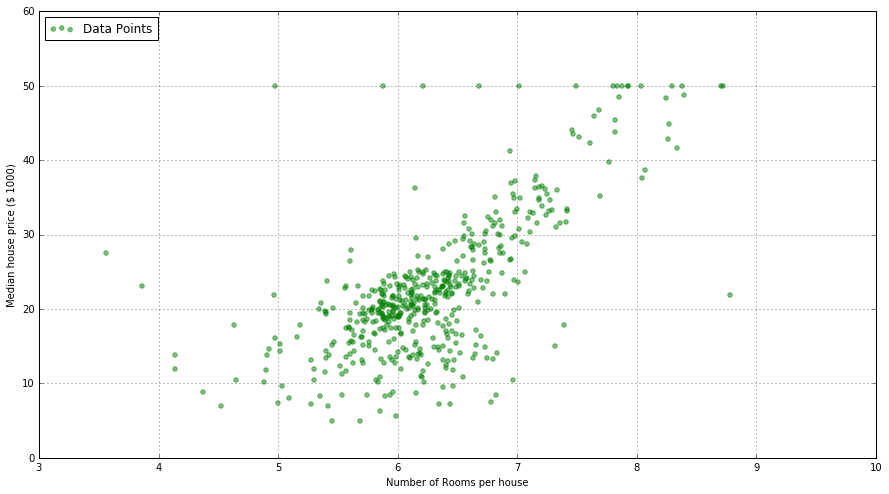

In [35]:
# Enter your code here
fig, ax = plt.subplots(figsize=(15, 8))
ax.grid(True)
#ax.text(8.7, 48, "y = -34.67 + 9.1x")
#ax.text(8.7, 59, "y = 66.05 - 22.64x + 2.47x^2")
ax.scatter(boston_df["RM"], boston_df["MEDV"], alpha=0.5, color='green', label ="Data Points")
pylab.ylabel("Median house price ($ 1000)")
pylab.xlabel("Number of Rooms per house")
pylab.legend(loc="upper left")

In [36]:
X = boston_df["RM"]
y = boston_df["MEDV"]

#creating test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state = 5)

In [37]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [38]:
# import the class
from sklearn.linear_model import LinearRegression

# instantiate the model (using the default parameters)
linreg = LinearRegression()

# fit the model with data
linear_model = linreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)



In [39]:
def compute_rmse(prediction,yvalues):
    if len(np.array(prediction))==len(np.array(yvalues)):
        rmse = np.sqrt(np.mean((np.array(prediction)-np.array(yvalues))**2))
    else:
        print("array length not equal")
        return -1
    return rmse   

print "Accuracy on the test set = %s"%(compute_rmse(y_pred_test, y_test))
print "Accuracy on the train set = %s"%(compute_rmse(y_pred_train, y_train))

Accuracy on the test set = 7.12181405083
Accuracy on the train set = 6.31981824627


### 4.2 So many scatterplots!

Choose 8 out of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

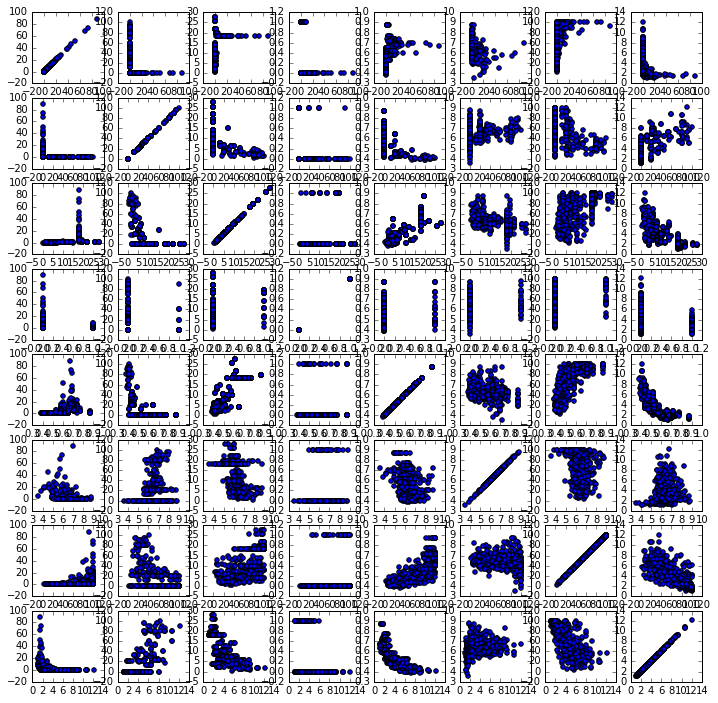

In [40]:
plt.figure(figsize=(12,12))
for i in xrange(8):
    for j in xrange(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        plt.scatter(bdata.data[:,i], bdata.data[:,j])

### 4.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

In [41]:
from sklearn import decomposition

#function to standardize
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

#creating test and train
X_train, X_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.34, random_state = 5)

#a list to store variances
variances = []

#capturing variance ratios
for i in range(1,12):
    pca = PCA(n_components=i)
    pca.fit(standardize(X_train))
    variances.append(sum(pca.explained_variance_ratio_))

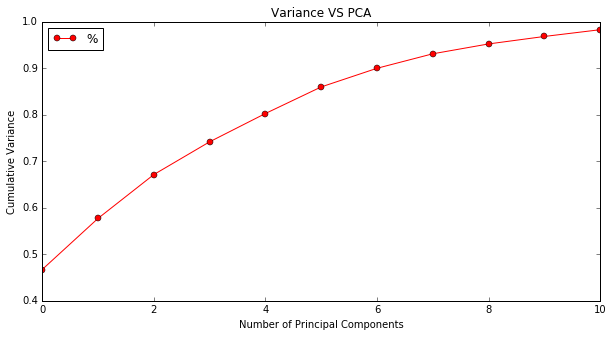

In [42]:
#plotting
pd.DataFrame(variances).plot(marker = "o", color = "red", figsize= (10,5), label = "line")
pylab.legend("%",loc="upper left")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.title("Variance VS PCA")

### 4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

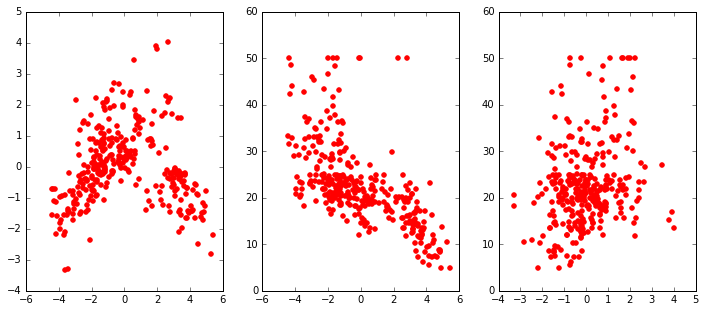

In [43]:
#creating a new pca on train data
pca_new = pca.fit_transform(standardize(X_train))

#plotting
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.scatter(pca_new[:,0],pca_new[:,1],color = "red")
ax2.scatter(pca_new[:,0],y_train,color = "red")
ax3.scatter(pca_new[:,1],y_train,color = "red")

### 4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 4.1?  Interpret your results!

In [44]:
model = decomposition.PCA(1)
train_projection = model.fit_transform(standardize(X_train))
test_projection = model.fit_transform(standardize(X_test))

linear_model = LinearRegression()
linear_model.fit(train_projection,y_train)

print linear_model.coef_[0]
print linear_model.intercept_

-2.33533229882
22.5867867868


In [46]:
train_preds = linear_model.predict(train_projection)

test_preds = linear_model.predict(test_projection)

print "The accuracy on training data = %s"%(compute_rmse(train_preds, y_train))
print "The accuracy on test data = %s"%(compute_rmse(test_preds, y_test))

The accuracy on training data = 6.8943418829
The accuracy on test data = 7.92681709668


* The results are similar to the above i.e. the test set shows more accuracy as compared to the train set.
* This is because the data has been transformed by using pca.